In [13]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import model_selection
#from sklearn.model_selection.grid_search import*
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
#X=np.load('TrainingDerniereSeconde.npy')
df = pd.read_csv('train.csv')
# we will try to learn from the last second
X = df.values
X = X[:,15830:15841]

In [6]:
#Xtest=np.load('TestDerniereSeconde.npy')
dfy = pd.read_csv('challenge_output_data_training_file_nba_challenge.csv',sep=';')
Y = dfy.values
Y = Y[:,1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [8]:
Id=np.load('IdTest.npy')

In [84]:
#dfy = pd.read_csv('challenge_fichier_de_sortie_dentrainement_challenge_nba.csv',sep=';')
#Y = dfy.values
#Ytrain = Y[:,1]
#Y.shape

(12576,)

In [9]:
mvs = svm.SVC()
resultat= mvs.fit(X_train,Y_train)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


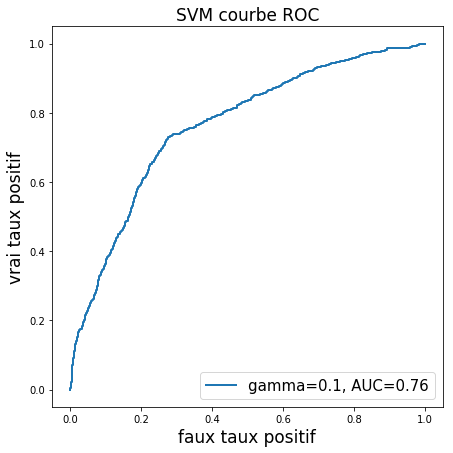

In [14]:
# prédire sur le jeu de test
Y_test_pred = resultat.decision_function(X_test)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(7,7))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.1, AUC=%.2f' % auc)

plt.xlabel('faux taux positif', fontsize=17)
plt.ylabel('vrai taux positif', fontsize=17)
plt.title('SVM courbe ROC', fontsize=17)

# afficher la légende
plt.legend(loc="lower right", fontsize=15)

# afficher l'image
plt.show()

In [20]:
df = pd.read_csv('test.csv')
# we will try to learn from the last second
Xtest = df.values
Xtest = Xtest[:,15830:15841]

In [21]:
Y_test_pred = resultat.decision_function(Xtest)

In [22]:
#Y_pred = resultat.predict(X_test)
Y_Result=np.array([Id,Y_test_pred])
print(Y_Result)

[[ 7.81000000e+02  9.14000000e+02  1.27950000e+04 ...  1.11990000e+04
   1.74320000e+04  4.23400000e+03]
 [ 4.53932407e-01 -7.01189582e-01 -1.10970995e+00 ... -4.83283028e-02
  -1.00828446e+00  3.07359546e-01]]


In [23]:
Y_Result=Y_Result.T

In [24]:
Y_Result.shape

(4192, 2)

In [25]:
np.savetxt('EssaiDerniereSeconde_SVM.csv',Y_Result,delimiter=';',fmt= '%i',header="Id_ds;label")

In [38]:
Y_result.shape

(4192, 2)

Validation croisée sur le jeu d'entraînement pour sélectionner les valeurs optimales de C et de gamma parmi une grille de valeurs avec accuracy.

In [27]:
#on fera ici la validation croisee de 10 configurations 
parametres = [{'C':[0.1,1,10],'kernel':['rbf','linear']}]

#on l'applique a notre jeu de donnees et on utilisera accuracy pour avoir la meilleure configuration
grid = model_selection.GridSearchCV(estimator=mvs,param_grid=parametres,scoring='accuracy')
grille = grid.fit(X_train,Y_train)

print(grille.best_params_)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

{'kernel': 'linear', 'C': 0.1}


In [28]:
print(grille.best_score_)

0.7205765407554672


Validation croisée sur le jeu d'entraînement pour sélectionner les valeurs optimales de C et de gamma parmi une grille de valeurs avec roc_auc.

In [30]:
# choisir 3 valeurs de C
C=np.array([0.1,1,10])
# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)
# grille de paramètres
param_grid = {'C': C, 'gamma': gamma_range}
# critère de sélection du meilleur modèle
score = 'roc_auc'
# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5,scoring=score)
# faire tourner la recherche sur grille
grid.fit(X_train, Y_train)
# afficher les paramètres optimaux
print("valeurs optimales: %s et Score: %.2f" % (grid.best_params_, grid.best_score_))

valeurs optimales: {'gamma': 0.01, 'C': 0.1} et Score: 0.78


Etude de la performance sur les donnes test 

In [31]:
mvs = svm.SVC(C = 0.1,gamma=0.01)
resultat= mvs.fit(X,Y)

In [33]:
Y_test_pred = resultat.decision_function(Xtest)

In [34]:
Y_Result=np.array([Id,Y_test_pred])
print(Y_Result)

[[ 7.81000000e+02  9.14000000e+02  1.27950000e+04 ...  1.11990000e+04
   1.74320000e+04  4.23400000e+03]
 [ 1.62581903e-01 -1.03061023e+00 -1.02045633e+00 ...  1.10757282e+00
  -1.02900343e+00  1.11613167e+00]]


In [35]:
Y_Result=Y_Result.T

In [36]:
np.savetxt('EssaiDerniereSeconde_SVMOptim.csv',Y_Result,delimiter=';',fmt= '%i',header="Id_ds;label")

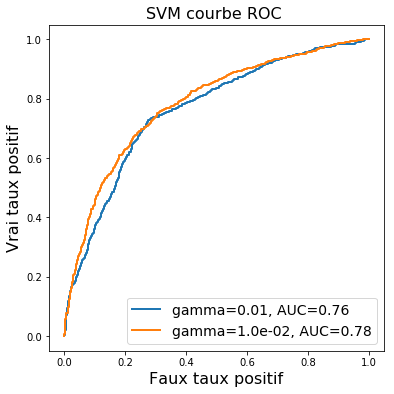

In [37]:
# prédire sur le jeu de test avec le modèle optimisé
Y_test_pred_cv = grid.decision_function(X_test)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(Y_test, Y_test_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))
         

# donner un titre aux axes et au graphique
plt.xlabel('Faux taux positif', fontsize=16)
plt.ylabel('Vrai taux positif', fontsize=16)
plt.title('SVM courbe ROC ', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()